# Homework 8

The code block below imports necessary packages.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt

## 1. Data Organization

In this problem, you will play around with `pandas.DataFrame` by making use of multiple built-in function supported by the package. Questions are set to be serial, so proceed with the data resulted in the previous problem for each problem. First, let's read in the Dow dataset.

In [2]:
df = pd.read_excel('impurity_dataset-training.xlsx')

Create a version of the Dow dataset that does not contain any null or non-numeric values. Print the first 10 rows of the data.

In [3]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    elif pd.isnull(x):
        return False
    else:
        return True
    
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X_dow = df[df.columns[1:]][real_rows]

X_dow.head(10)

x1:Primary Column Reflux Flow  x2:Primary Column Tails Flow  \
0                        327.813                       45.7920   
1                        322.970                       46.1643   
2                        319.674                       45.9927   
3                        327.223                       46.0960   
4                        331.177                       45.8493   
5                        328.884                       46.0729   
6                        327.335                       46.0581   
7                        329.935                       45.9708   
8                        329.128                       45.8875   
9                        327.686                       45.8192   

   x3:Input to Primary Column Bed 3 Flow  \
0                                2095.06   
1                                2101.00   
2                                2102.96   
3                                2101.37   
4                                2114.06   
5                                2100.26   
6                                2101.57   
7                                2099.27   
8                                2099.12   
9                                2109.75   

   x4:Input to Primary Column Bed 2 Flow  \
0                                2156.01   
1                                2182.90   
2                                2151.39   
3                                2172.14   
4                                2157.77   
5                                2134.76   
6                                2191.37   
7                                2133.95   
8                                2055.11   
9                                2185.82   

   x5:Primary Column Feed Flow from Feed Column  x6:Primary Column Make Flow  \
0                                       98.5005                      95.4674   
1                                       98.0014                      94.9673   
2                                       98.8229                      96.0785   
3                                       98.7733                      96.1223   
4                                       99.3231                      94.7521   
5                                       99.3376                      95.4188   
6                                       98.9044                      94.9811   
7                                       99.6756                      94.8352   
8                                       98.8823                      95.0573   
9                                       98.8448                      95.5414   

   x7:Primary Column Base Level  x8:Primary Column Reflux Drum Pressure  \
0                       54.3476                                 41.0121   
1                       54.2247                                 41.0076   
2                       54.6130                                 41.0451   
3                       54.9153                                 41.0405   
4                       54.0925                                 40.9934   
5                       53.9989                                 41.0217   
6                       54.0685                                 41.0499   
7                       54.0001                                 40.9886   
8                       53.9876                                 41.0169   
9                       54.0806                                 41.0029   

   x9:Primary Column Condenser Reflux Drum Level  x10:Primary Column Bed1 DP  \
0                                        52.2353                     6.86666   
1                                        52.5378                     6.70838   
2                                        52.0159                     6.75303   
3                                        52.9477                     6.93766   
4                                        53.0507                     6.87966   
5                                        53.0389                     6.94884   
6                                      

Show that your data does not contain any null values.

***Hint***: It could be useful to use `pandas.isnull` function. Please refer to the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html).

In [4]:
X_dow.isnull().any()

x1:Primary Column Reflux Flow                    False
x2:Primary Column Tails Flow                     False
x3:Input to Primary Column Bed 3 Flow            False
x4:Input to Primary Column Bed 2 Flow            False
x5:Primary Column Feed Flow from Feed Column     False
x6:Primary Column Make Flow                      False
x7:Primary Column Base Level                     False
x8:Primary Column Reflux Drum Pressure           False
x9:Primary Column Condenser Reflux Drum Level    False
x10:Primary Column Bed1 DP                       False
x11:Primary Column Bed2 DP                       False
x12:Primary Column Bed3 DP                       False
x13:Primary Column Bed4 DP                       False
x14:Primary Column Base Pressure                 False
x15:Primary Column Head Pressure                 False
x16:Primary Column Tails Temperature             False
x17:Primary Column Tails Temperature 1           False
x18:Primary Column Bed 4 Temperature             False
x19:Primar

Drop the `Avg_Delta_Composition_Primary_Column` column. Show the first 5 rows of the data.

In [5]:
df_no_avg_delta = X_dow.drop('Avg_Delta_Composition Primary Column', axis = 1)
df_no_avg_delta.head(5)

x1:Primary Column Reflux Flow  x2:Primary Column Tails Flow  \
0                        327.813                       45.7920   
1                        322.970                       46.1643   
2                        319.674                       45.9927   
3                        327.223                       46.0960   
4                        331.177                       45.8493   

   x3:Input to Primary Column Bed 3 Flow  \
0                                2095.06   
1                                2101.00   
2                                2102.96   
3                                2101.37   
4                                2114.06   

   x4:Input to Primary Column Bed 2 Flow  \
0                                2156.01   
1                                2182.90   
2                                2151.39   
3                                2172.14   
4                                2157.77   

   x5:Primary Column Feed Flow from Feed Column  x6:Primary Column Make Flow  \
0                                       98.5005                      95.4674   
1                                       98.0014                      94.9673   
2                                       98.8229                      96.0785   
3                                       98.7733                      96.1223   
4                                       99.3231                      94.7521   

   x7:Primary Column Base Level  x8:Primary Column Reflux Drum Pressure  \
0                       54.3476                                 41.0121   
1                       54.2247                                 41.0076   
2                       54.6130                                 41.0451   
3                       54.9153                                 41.0405   
4                       54.0925                                 40.9934   

   x9:Primary Column Condenser Reflux Drum Level  x10:Primary Column Bed1 DP  \
0                                        52.2353                     6.86666   
1                                        52.5378                     6.70838   
2                                        52.0159                     6.75303   
3                                        52.9477                     6.93766   
4                                        53.0507                     6.87966   

   ...  x35: Secondary Column Tails Concentration  \
0  ...                                   0.013060   
1  ...                                   0.013666   
2  ...                                   0.013498   
3  ...                                   0.013104   
4  ...                                   0.013085   

   x36: Feed Column Recycle Flow  \
0                        62.8707   
1                        62.8651   
2                        62.8656   
3                        62.8669   
4                        62.8673   

   x37: Feed Column Tails Flow to Primary Column  \
0                                        45.0085   
1                                        45.0085   
2                                        45.0085   
3                                        45.0085   
4                                        45.0085   

   x38: Feed Column Calculated DP  x39: Feed Column Steam Flow  \
0                         66.6604                      8.68813   
1                         66.5496                      8.70683   
2                         66.0599                      8.69269   
3                         67.9697                      8.70482   
4                         67.6454                      8.70077   

   x40: Feed Column Tails Flow  Avg_Reactor_Outlet_Impurity  y:Impurity  \
0                      99.9614                      5.38024     1.77833   
1                      99.8637                      5.33345     1.76964   
2                     100.2490                      5.37677     1.76095   
3                     100.3200                      5.32315     1.75226   
4                     100.6590            

Let's assume that features from `x1` to `x40` are independent of each other and normally distributed dataset. For these features, use a z-score cutoff of 3 and assess what percentage of the data is identified as outliers with this approach.

***You may identify a data point (a single row) as an outlier whenever z-score > 3 is detected in any features.***

In [6]:
# for each feature

for col in X_dow.columns[:40]:
    xi = X_dow[col].copy()
    mu = np.mean(xi)
    stdev = np.std(xi)
    z_cutoff = 3

    zi = (xi - mu)/stdev
    xi_nooutliers = xi[np.abs(zi) < z_cutoff]
    print(col)
    print('Percentage of outliers: {:.2f}%'.format(100 - xi_nooutliers.shape[0] / xi.shape[0] * 100))
    print()

x1:Primary Column Reflux Flow
Percentage of outliers: 2.97%

x2:Primary Column Tails Flow
Percentage of outliers: 2.90%

x3:Input to Primary Column Bed 3 Flow
Percentage of outliers: 2.98%

x4:Input to Primary Column Bed 2 Flow
Percentage of outliers: 3.21%

x5:Primary Column Feed Flow from Feed Column
Percentage of outliers: 4.22%

x6:Primary Column Make Flow
Percentage of outliers: 5.17%

x7:Primary Column Base Level
Percentage of outliers: 2.67%

x8:Primary Column Reflux Drum Pressure
Percentage of outliers: 1.95%

x9:Primary Column Condenser Reflux Drum Level
Percentage of outliers: 2.95%

x10:Primary Column Bed1 DP
Percentage of outliers: 0.07%

x11:Primary Column Bed2 DP
Percentage of outliers: 0.04%

x12:Primary Column Bed3 DP
Percentage of outliers: 0.00%

x13:Primary Column Bed4 DP
Percentage of outliers: 0.00%

x14:Primary Column Base Pressure
Percentage of outliers: 1.94%

x15:Primary Column Head Pressure
Percentage of outliers: 1.94%

x16:Primary Column Tails Temperature
Pe

In [7]:
# for the whole dataset

xi_nooutliers = pd.DataFrame()
for col in X_dow.columns[:40]:
    xi = X_dow[col].copy()
    mu = np.mean(xi)
    stdev = np.std(xi)
    z_cutoff = 3

    zi = (xi - mu)/stdev
    xi_nooutliers[col] = xi[np.abs(zi) < z_cutoff]
    
## observations without outliers in any features
xi_nooutliers_in_any_features = xi_nooutliers.loc[~xi_nooutliers.isnull().any(axis = 1)]

## percentage
print('Percentage of outliers: {:.2f}%'.format(100 - xi_nooutliers_in_any_features.shape[0] / X_dow.shape[0] * 100))

Percentage of outliers: 7.58%


Remove those outliers and plot the distribution of each feature as histograms before & after outlier removals.

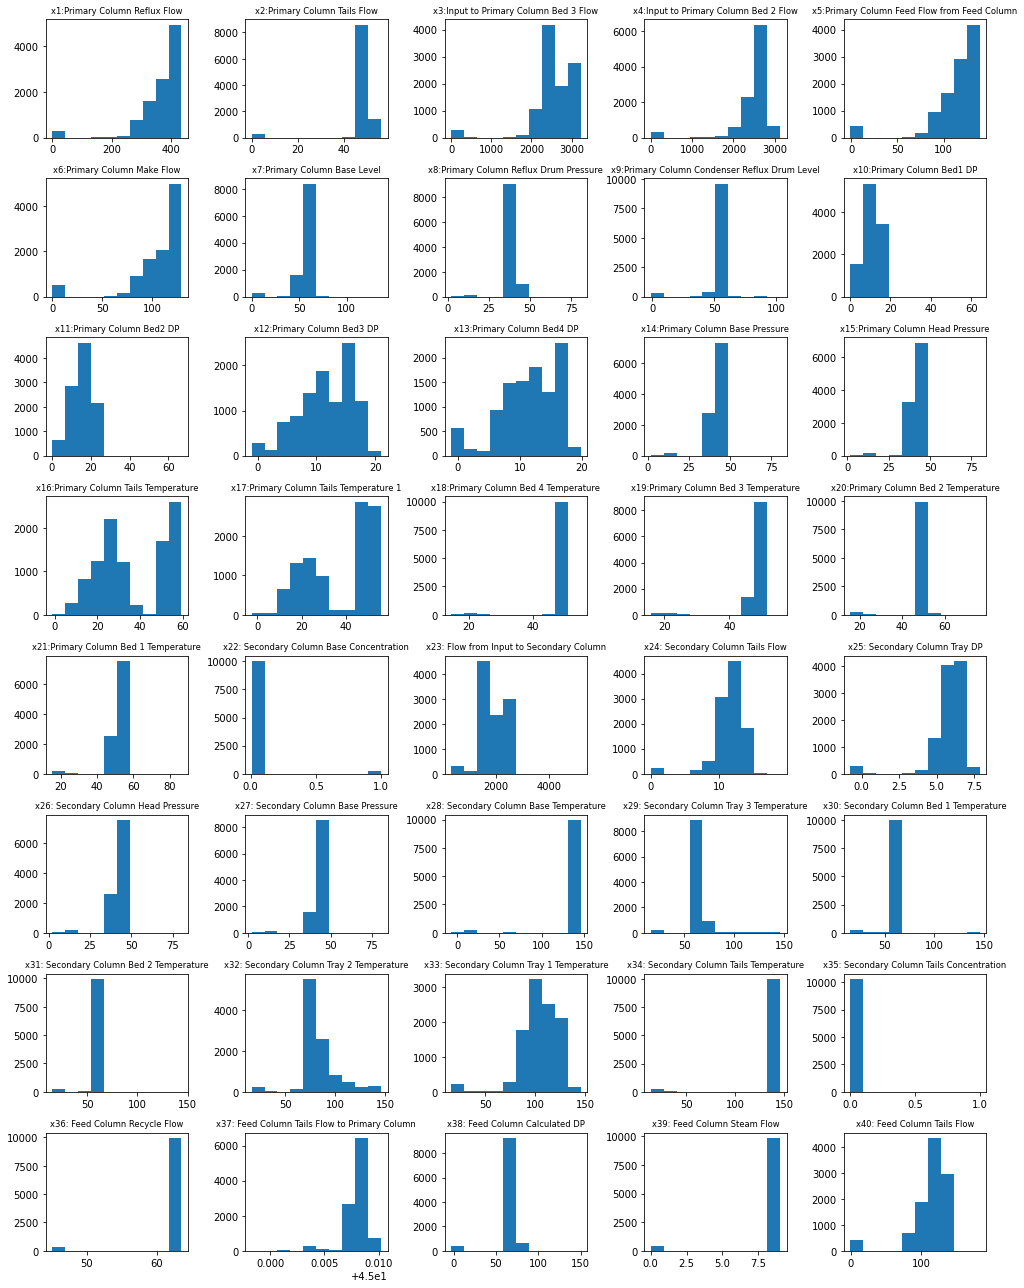

In [8]:
# Histograms before removing outliers
fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.hist(X_dow.iloc[:, i])
    ax.set_title(X_dow.columns[i], fontsize = 'small')
plt.tight_layout()

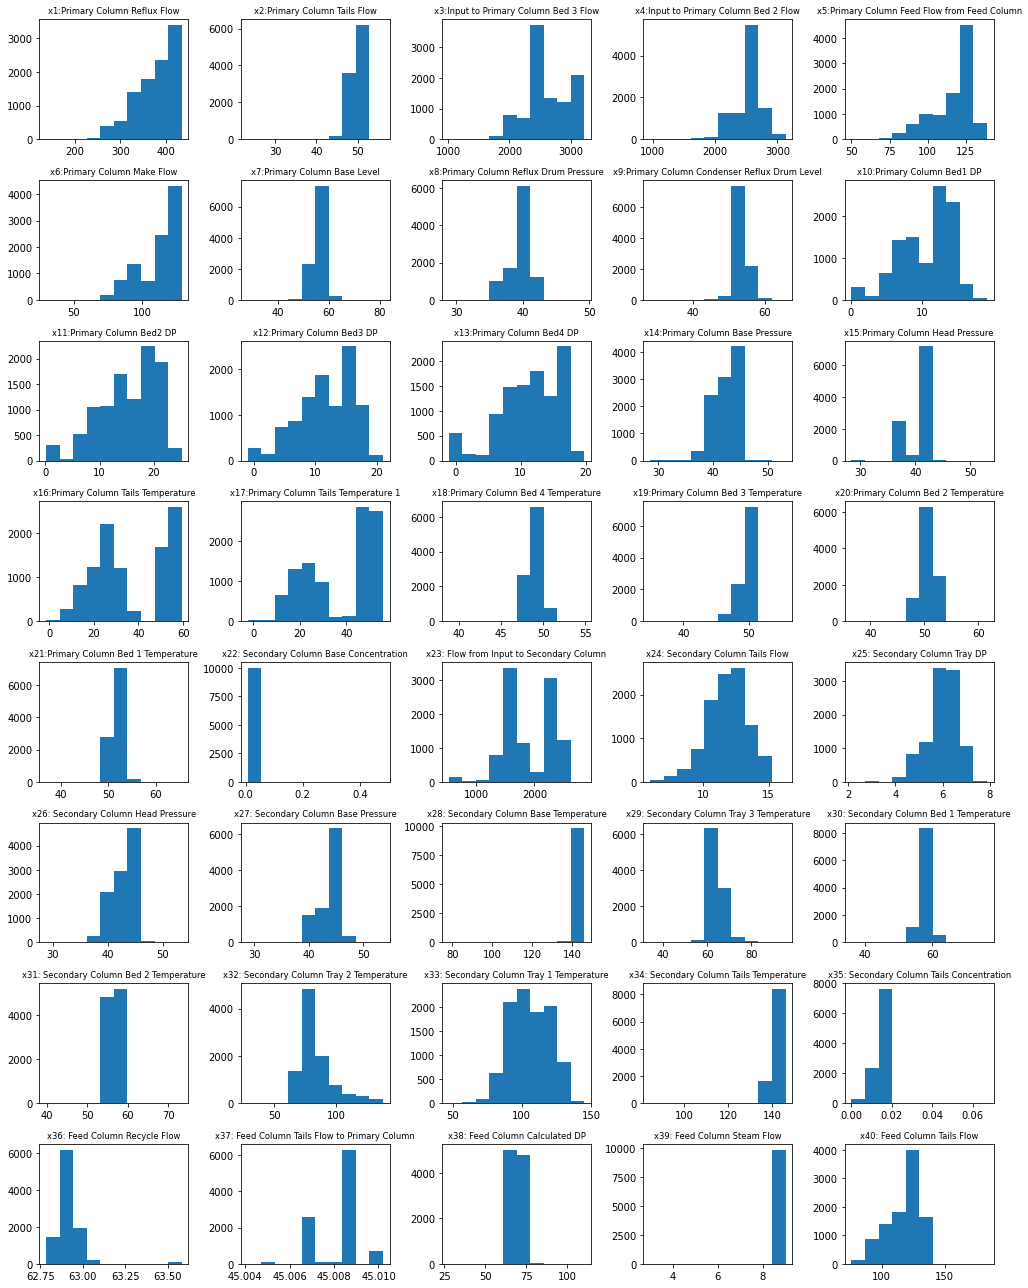

In [9]:
# Histograms after removing outliers
fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, col in enumerate(X_dow.columns[:40]):
    xi = X_dow[col].copy()
    mu = np.mean(xi)
    stdev = np.std(xi)
    z_cutoff = 3

    zi = (xi - mu)/stdev
    xi_nooutliers = xi[np.abs(zi) < z_cutoff]

    axes[i].hist(xi_nooutliers)
    axes[i].set_title(col, fontsize = 'small')

plt.tight_layout()

## 2. Online Data Access

Rank the following approaches from most reliable to least reliable:

- HTML scraping
- Unofficial Python API
- JSON file returned from HTTP request
- RESTful API
- Official Python API (developed by data maintainer)

Briefly rationalize your rankings.

1. Official Python API
2. RESTful API
3. Unofficial Python API
4. JSON file returned from HTTP request
5. HTML scraping

In general, APIs are definitely more reliable than directly dealing with JSON or HTML. Among APIs, official ones should be placed first, since they are consistently maintained by data professionals. With similar reasoning, unofficial Python API would be the least reliable. HTML scraping is the most tedious and time-consuming approach to handle, so I will put this at the bottom of the list.